In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from fktools import *

from sklearn.model_selection import train_test_split

from dist_metric import DistributionOverlap


from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.layers import Input, Dense, Dropout

2026-01-20 19:28:22.389229: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-20 19:28:22.425670: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-20 19:28:23.353658: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/filip/miniconda3/envs/defects/lib/python3.11/site-packages/keras/src/export/tf2onnx_l

In [3]:
X = np.load("dataset_denoising_multiple_X.npz")['arr_0']
y = np.load("dataset_denoising_multiple_y.npz")['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"X train size: {X_train.shape}")
print(f"X test size: {X_test.shape}")

X shape: (58711, 8)
y shape: (58711, 8)
X train size: (46968, 8)
X test size: (11743, 8)


In [4]:
model = Sequential([
    Input(shape=(8,)),

    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),

    Dense(8, activation="softmax"),
])

model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss = KLDivergence(),
    metrics=[DistributionOverlap()],
)

# model learning
history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
)

loss, dist_overlap = model.evaluate(
    X_test,
    y_test,
    verbose=0,
)

2026-01-20 19:28:23.518791: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2026-01-20 19:28:23.518819: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:160] env: CUDA_VISIBLE_DEVICES="-1"
2026-01-20 19:28:23.518823: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2026-01-20 19:28:23.518826: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2026-01-20 19:28:23.518829: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: bogdan
2026-01-20 19:28:23.518831: I external/local_xla/xla/stream_executor/cuda/cuda_d

Epoch 1/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dist_overlap: 0.6012 - loss: 0.5655 - val_dist_overlap: 0.7249 - val_loss: 0.2780
Epoch 2/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - dist_overlap: 0.7335 - loss: 0.2703 - val_dist_overlap: 0.7762 - val_loss: 0.2067
Epoch 3/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - dist_overlap: 0.7628 - loss: 0.2264 - val_dist_overlap: 0.7896 - val_loss: 0.1904
Epoch 4/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - dist_overlap: 0.7741 - loss: 0.2121 - val_dist_overlap: 0.7938 - val_loss: 0.1855
Epoch 5/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - dist_overlap: 0.7794 - loss: 0.2052 - val_dist_overlap: 0.7960 - val_loss: 0.1838
Epoch 6/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - dist_overlap: 0.7829 - loss: 0.2006 - val_dist_overlap: 0.7979 - val_loss: 0.1819
Epoch 7/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - dist_overlap: 0.7857 - loss: 0.1969 - val_dist_overlap: 0.7992 - val_loss: 0.1807
Epoch 8/100
117

In [6]:
print(f"test loss: {loss}")
print(f"test overlap: {dist_overlap}")

test loss: [0.5655360221862793, 0.2702772915363312, 0.22643761336803436, 0.21210087835788727, 0.20519772171974182, 0.2006305754184723, 0.19692794978618622, 0.1954355388879776, 0.19352546334266663, 0.1914447546005249, 0.19061869382858276, 0.18941497802734375, 0.1887933611869812, 0.18784871697425842, 0.18686412274837494, 0.186209037899971, 0.18568570911884308, 0.18477733433246613, 0.1837458461523056, 0.18360428512096405, 0.18282800912857056, 0.18356989324092865, 0.18261152505874634, 0.18240147829055786, 0.1816835105419159, 0.18108676373958588, 0.18080322444438934, 0.18131789565086365, 0.1803903877735138, 0.18015500903129578, 0.18029552698135376, 0.179547518491745, 0.17968112230300903, 0.1790638566017151, 0.1794746369123459, 0.17878690361976624, 0.17926950752735138, 0.17832200229167938, 0.17861594259738922, 0.17813991010189056, 0.17850752174854279, 0.1778218001127243, 0.17827501893043518, 0.17806993424892426, 0.17668309807777405, 0.1774614453315735, 0.17809416353702545, 0.1769559830427169

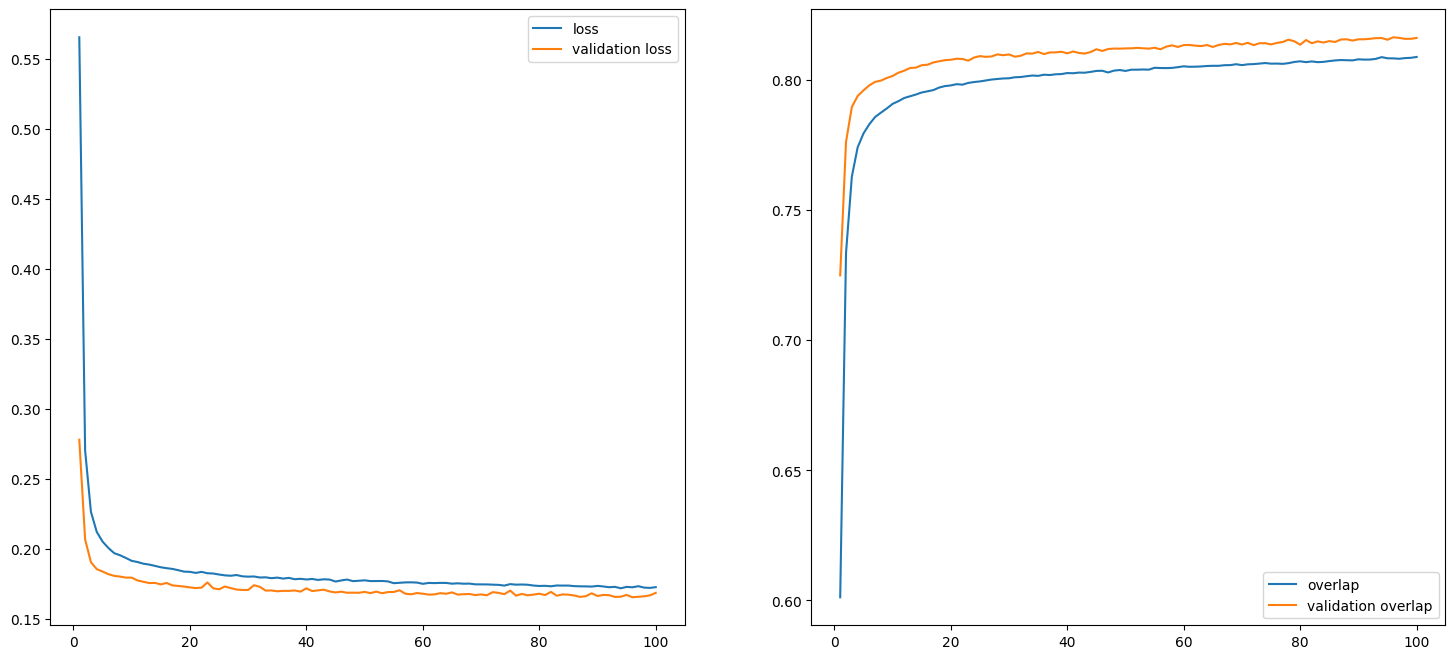

In [5]:
loss = history.history['loss']
acc = history.history['dist_overlap']

val_loss = history.history['val_loss']
val_acc = history.history['val_dist_overlap']

epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].plot(epochs, val_loss, label="validation loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="overlap")
ax[1].plot(epochs, val_acc, label="validation overlap")
ax[1].legend()